<a href="https://colab.research.google.com/github/JJJJeon/ESAA/blob/main/12%EC%A3%BC%EC%B0%A82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01 합성곱 신경망**
**합성곱 신경망(CNN: Convolutional Neutral Network)**

: 데이터가 가진 특징들의 패턴을 학습하는 알고리즘 (이미지 분류, 객체 탐지, 스타일 전이 등)

### **1-1 이미지 표현**
이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함



*   손글씨 이미지: 숫자로 각 픽셀의 화소  값 나타내는 방식으로 표현
*   컬러 이미지: R,G,B 채널로 구성된 3장의 이미지를 하나로 결합하여 표현하는 방식




### **1-2 합성곱(Convolution)**
**합성곱 연산**

: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법 -> 특성맵(feature map)


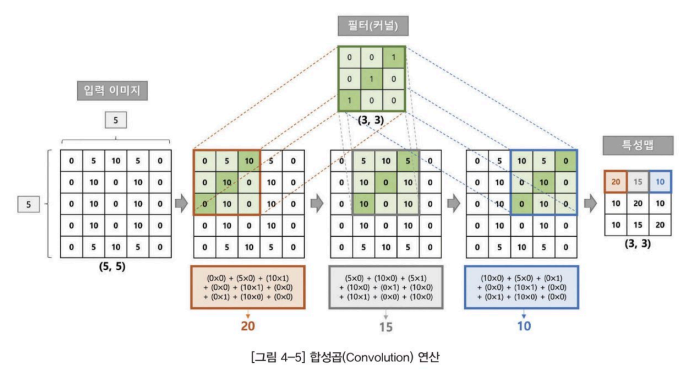

커널 사이즈만큼의 가중치를 가지며 오차 역전파 시 커널의 가중치 업데이트

커널의 공유 가중치 <- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유

### **1-3 채널(channel)**
입력 이미지를 구성하는 2차원 배열의 개수 (흑백: 단일 채널, 컬러: 3개의 채널)

여러 개의 채널을 갖는 경우


1.   입력 이미지의 채녈 개수만큼 커널 생성
2.   각 채널마다 하나씩 커널 적용하여 합성곱 연산 수행
3.   입력 이미지의 채널 개수만큼 합성곱 연산된 결과를 element-wise 덧셈 연산으로 모두 더해줌




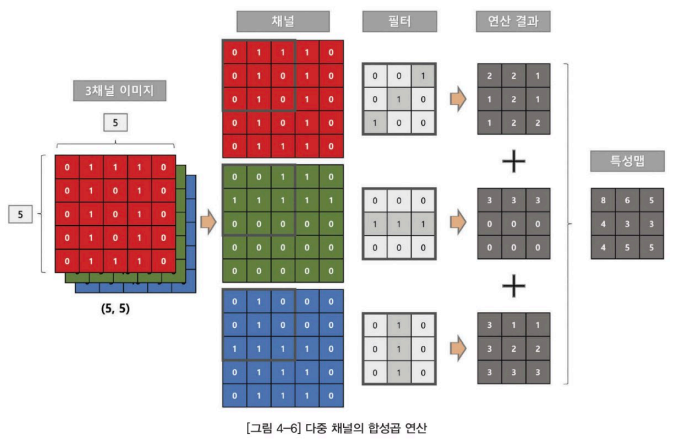

### **1-4 스트라이드(stride)**
커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나갈 때 이동하는 간격

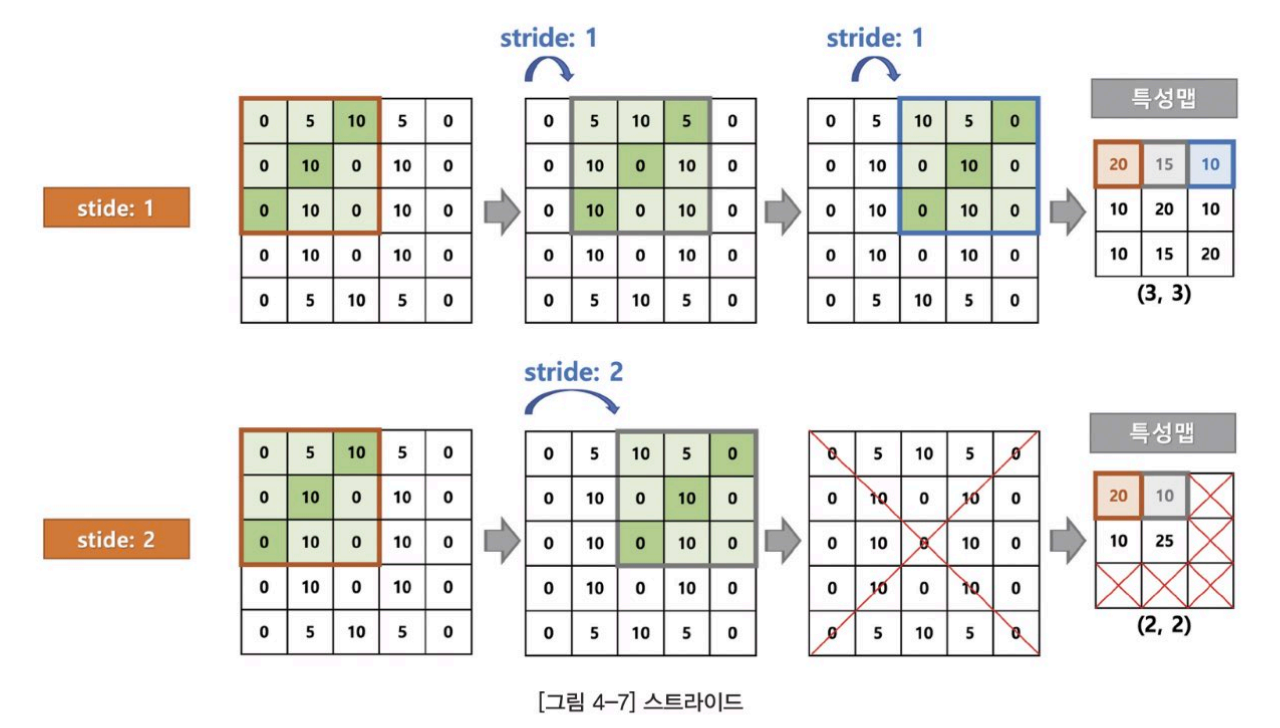

### **1-5 패딩(padding)**
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 설정

일반적으로 zero-padding(입력 이미지의 가장 자리에 0으로 채움) 사용 -> 특성맵 크기 줄어들지 않음

zero-padding 적용: 기본값 padding='same' -> padding='valid'

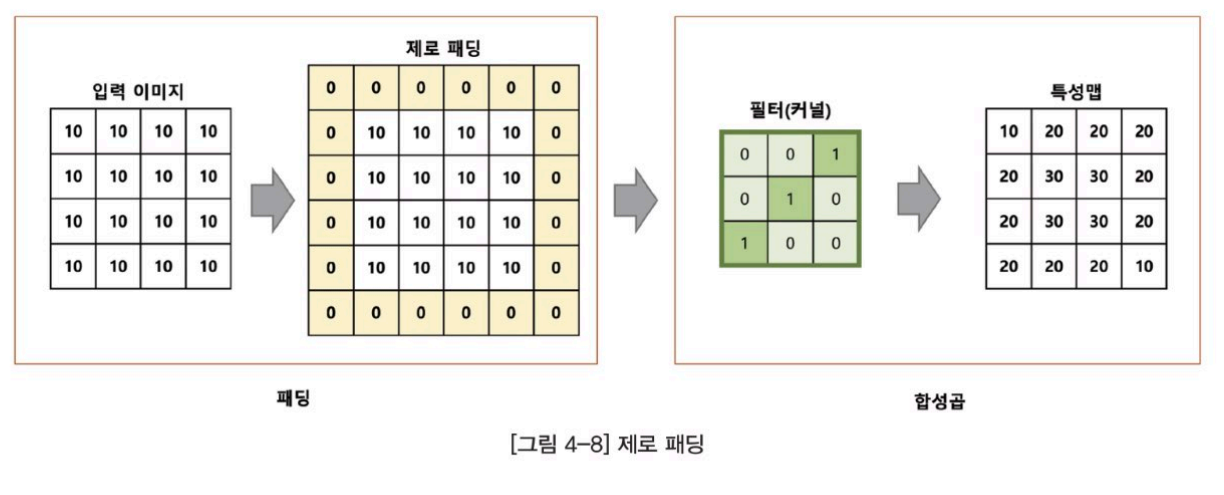

### **1-6 특성맵(feature map) 사이즈**
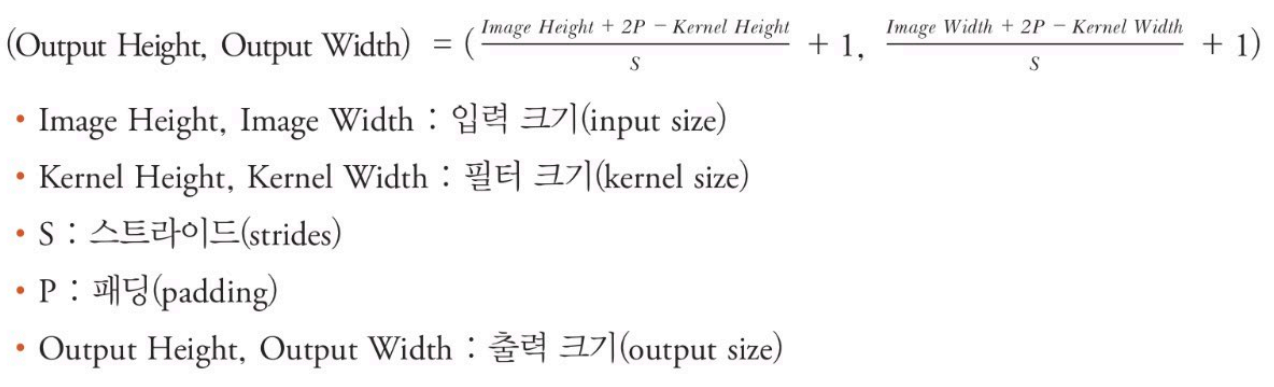

### **풀링(pooling)**
**풀링 레이어**: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어

이점: 이미지 축소를 통해 연산량 감소, 과대적합 방지


*   최대 풀링
*   평균 풀링
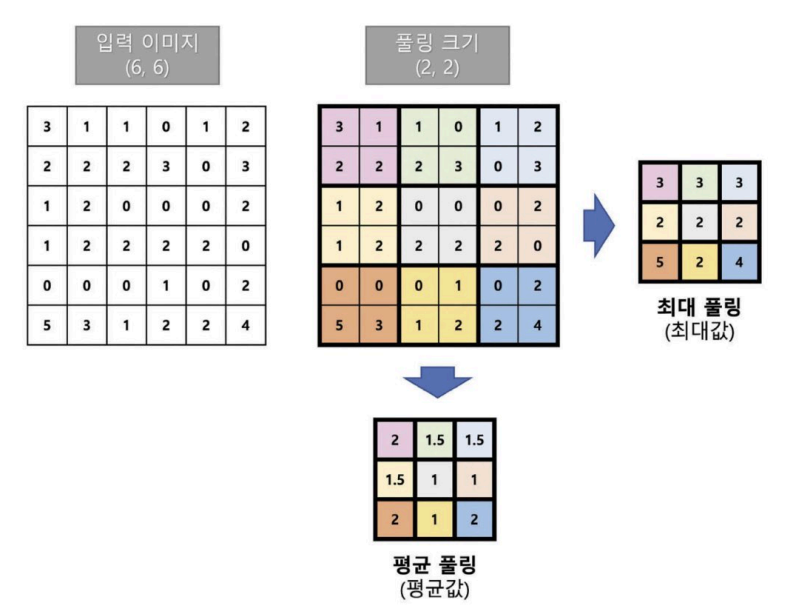



## **02 간단한 모델 생성**
### **2-1 데이터 로드 및 전처리**

In [1]:
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


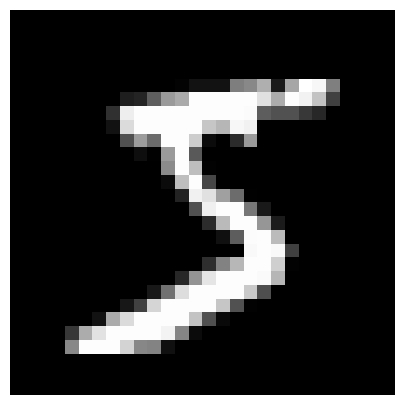

In [3]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap='gray')
  plt.axis('off')
  plt.show

plot_image(x_train,0)

In [4]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())
# 이미지 픽셀이 0~255 범위의 숫자로 구성됨

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [7]:
# 채널 추가
print(x_train.shape, x_valid.shape)

# tf.newaxis 축을 텐서 배열에 직접 추가하는 방식 (가장 마지막 축에 추가)
x_train_in=x_train[...,tf.newaxis] 
x_valid_in=x_valid[...,tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### **2-2 Sequential API로 모델 생성 및 학습**


In [10]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', 
                           input_shape=(28,28,1),name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [11]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.2097 - accuracy: 0.9405 - val_loss: 0.0914 - val_accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0791 - accuracy: 0.9769 - val_loss: 0.0648 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0569 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0557 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0555 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0571 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0579 -

In [12]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0592 - accuracy: 0.9832


[0.05915524810552597, 0.9832000136375427]

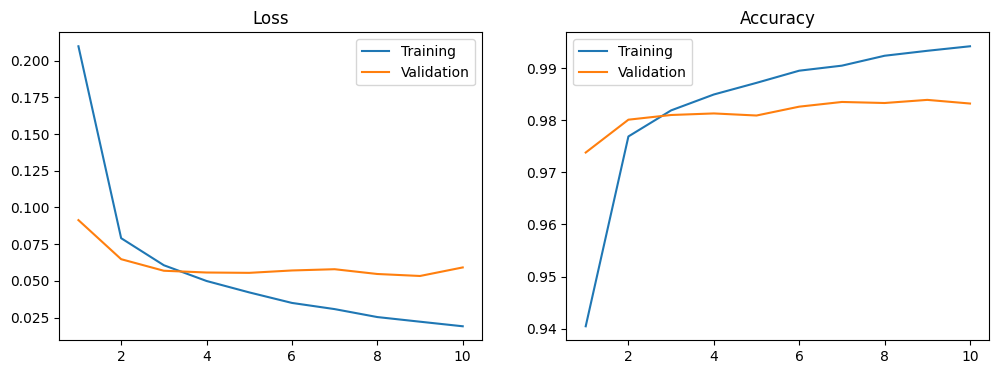

In [13]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### **2-3 모델 구조 파악**

In [14]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [17]:
#레이어
model.layers

In [18]:
#첫번째 레이어 선택
model.layers[0]

In [19]:
#첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [20]:
#첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [21]:
#첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 4.96996462e-01,  1.85817242e-01, -4.01659310e-02,
           -2.89609760e-01,  4.04549241e-01,  3.06901991e-01,
            1.35752246e-01, -8.61749202e-02, -9.59036648e-01,
            3.20530534e-01, -4.76861209e-01,  1.08171709e-01,
            1.24903686e-01, -3.23101014e-01, -4.58796680e-01,
           -4.27188575e-01,  2.64086634e-01, -1.46310404e-01,
           -7.13115335e-01,  4.06766862e-01, -6.37906194e-01,
           -6.74405456e-01,  3.50680709e-01, -6.24013782e-01,
           -1.32272100e+00,  2.95549333e-01, -2.70604759e-01,
            3.00804138e-01,  3.30538929e-01,  6.39865594e-03,
            2.84890324e-01,  3.08489352e-02]],
 
         [[ 1.71497107e-01,  2.07429186e-01,  6.07097089e-01,
           -8.61800373e-01,  4.95248428e-03,  8.97054523e-02,
            3.75776559e-01,  9.91007835e-02,  1.18054740e-01,
            4.01746869e-01,  2.63047457e-01,  1.14366310e-02,
           

In [22]:
#첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 4.96996462e-01,  1.85817242e-01, -4.01659310e-02,
          -2.89609760e-01,  4.04549241e-01,  3.06901991e-01,
           1.35752246e-01, -8.61749202e-02, -9.59036648e-01,
           3.20530534e-01, -4.76861209e-01,  1.08171709e-01,
           1.24903686e-01, -3.23101014e-01, -4.58796680e-01,
          -4.27188575e-01,  2.64086634e-01, -1.46310404e-01,
          -7.13115335e-01,  4.06766862e-01, -6.37906194e-01,
          -6.74405456e-01,  3.50680709e-01, -6.24013782e-01,
          -1.32272100e+00,  2.95549333e-01, -2.70604759e-01,
           3.00804138e-01,  3.30538929e-01,  6.39865594e-03,
           2.84890324e-01,  3.08489352e-02]],

        [[ 1.71497107e-01,  2.07429186e-01,  6.07097089e-01,
          -8.61800373e-01,  4.95248428e-03,  8.97054523e-02,
           3.75776559e-01,  9.91007835e-02,  1.18054740e-01,
           4.01746869e-01,  2.63047457e-01,  1.14366310e-02,
           3.02969784e-01, -

In [23]:
#첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-1.04592703e-01, -1.05762735e-01, -1.58201847e-02, -4.94084263e-04,
       -4.21023786e-01, -7.43877068e-02, -9.53227375e-03, -9.83373672e-02,
       -9.51493755e-02, -3.47943455e-01, -2.65036196e-01, -1.80561453e-01,
       -1.92438766e-01,  2.13194981e-01, -1.18668817e-01, -6.02415251e-03,
       -2.59490963e-02, -2.64353991e-01, -2.25695074e-02,  2.73111719e-03,
       -2.69420475e-01, -6.42092079e-02, -5.12913465e-01, -2.52443612e-01,
        2.40689758e-02, -4.66491789e-01, -1.78935006e-02, -9.70566273e-03,
       -3.01468074e-01, -8.58208630e-03, -2.92677850e-01, -2.11407721e-01],
      dtype=float32)>

In [24]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [25]:
#샘플 이미지의 레이어별 출력을리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 160ms/step


2

In [26]:
#첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

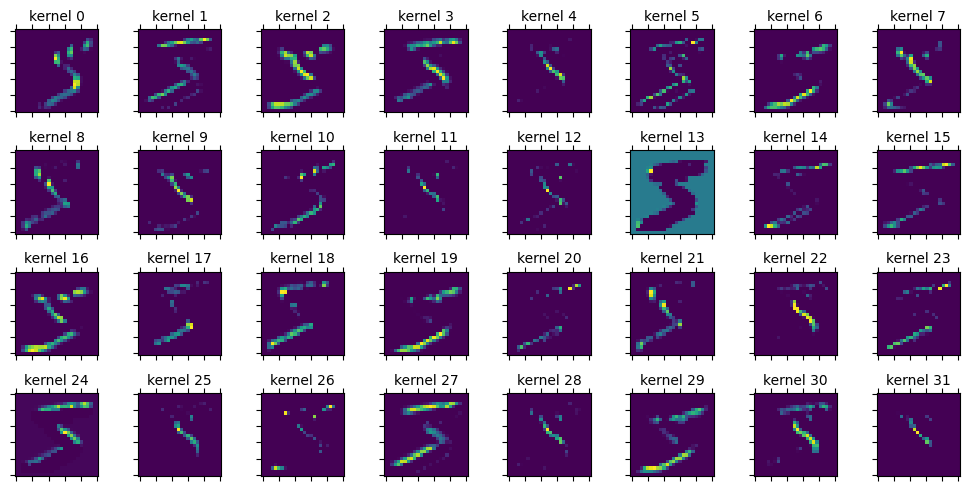

In [27]:
# Convolution 시각화
fig,axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [28]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


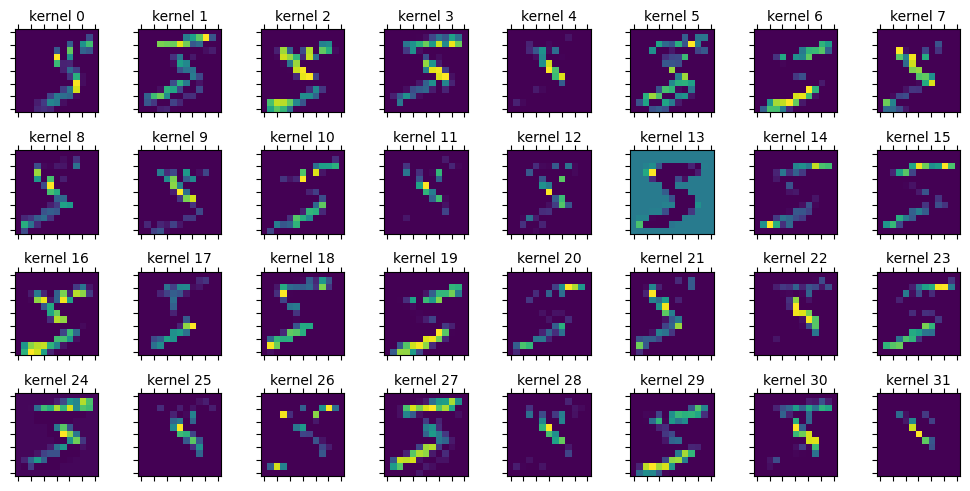

In [29]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## **03 복잡한 모델 생성**
### **3-1 데이터셋 준비**

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [32]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y%2 ==0 : 
    y_train_odd.append(0)
  else : 
    y_train_odd.append(1)
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [33]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [34]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [35]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### **3-2 Functional API로 다중 입력, 다중 출력 레이어 생성**

In [36]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

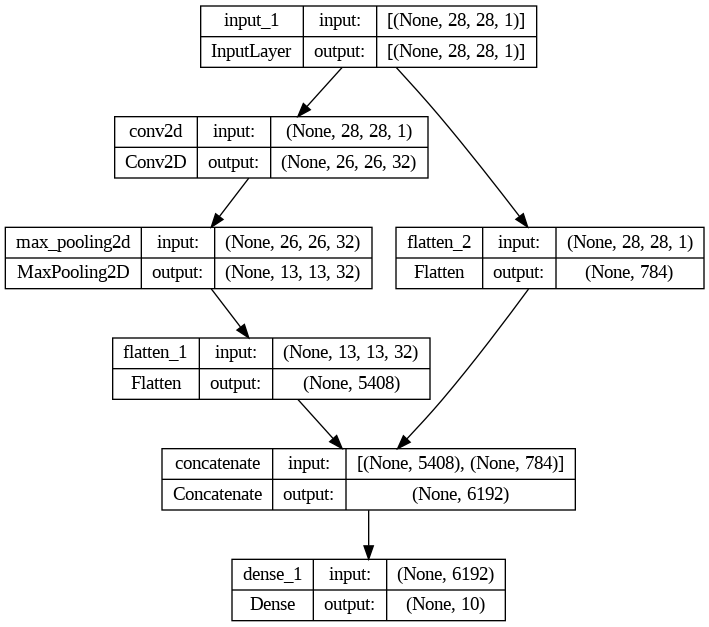

In [37]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file = 'functional_cnn.png')

In [38]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2219 - accuracy: 0.9370 - val_loss: 0.0973 - val_accuracy: 0.9714
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0837 - accuracy: 0.9757 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0582 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0485 - accuracy: 0.9857 - val_loss: 0.0570 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0534 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0582 -

### **3-3 다중 출력 분류 모델**

In [39]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [40]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


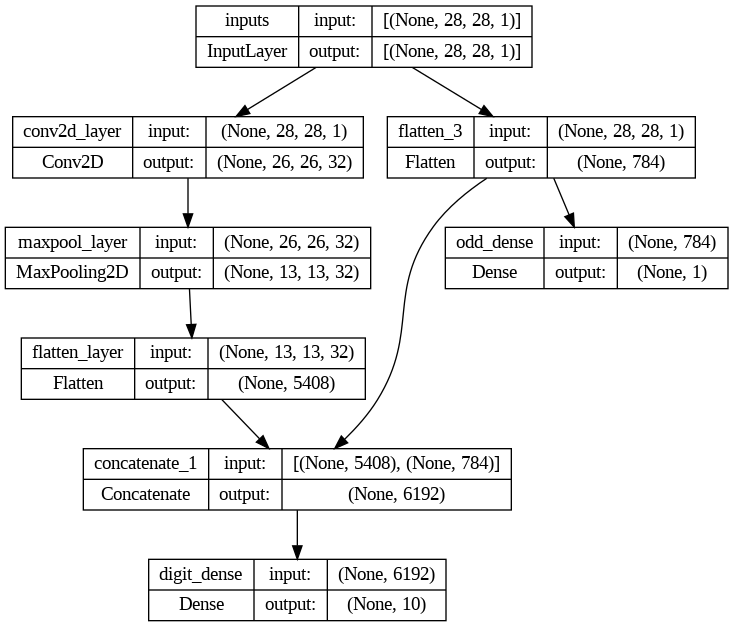

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3726 - digit_dense_loss: 0.2104 - odd_dense_loss: 0.3243 - digit_dense_accuracy: 0.9401 - odd_dense_accuracy: 0.8654 - val_loss: 0.2328 - val_digit_dense_loss: 0.0946 - val_odd_dense_loss: 0.2765 - val_digit_dense_accuracy: 0.9722 - val_odd_dense_accuracy: 0.8896
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2195 - digit_dense_loss: 0.0838 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9754 - odd_dense_accuracy: 0.8902 - val_loss: 0.1984 - val_digit_dense_loss: 0.0669 - val_odd_dense_loss: 0.2630 - val_digit_dense_accuracy: 0.9777 - val_odd_dense_accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1954 - digit_dense_loss: 0.0641 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9805 - odd_dense_accuracy: 0.8961 - val_loss: 0.1908 - val_digit_dense_loss: 0.0590 - val_odd_dense_loss: 0.2637 - val_digit_dense_accuracy: 0.9809 -

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

In [ ]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

In [ ]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

### **3-4 전이 학습(Transfer Learning)**

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

In [ ]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

In [ ]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

In [ ]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

In [ ]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

In [ ]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)